**In this project, we explored the application of unsupervised learning techniques for anomaly detection in an IoT network traffic dataset. The dataset contained various features related to network traffic, including flow duration, header length, protocol type, duration, rate, and several others. The goal was to identify unusual or suspicious patterns in the network traffic that could potentially indicate security threats or anomalies.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intrusion-in-iot/cleaned_iot.csv


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/intrusion-in-iot/cleaned_iot.csv')

# Explore the dataset
print("First few rows of the dataset:")
print(data.head())

print("\nDataset information:")
print(data.info())

print("\nDataset summary statistics:")
print(data.describe())

print("\nChecking for missing values:")
print(data.isnull().sum())

First few rows of the dataset:
   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0                1                0                1  ...   
1     4.290556    0.0                0                0                0  ...   
2    33.396799    0.0                0                0                0  ...   
3  4642.133010    0.0                0                0                0  ...   
4     6.202211    0.0                0                1                0  ...   

         Std  Tot size          IAT  Number

* The dataset has 1,048,575 rows and 47 columns, which is a significant amount of data to work with.
* There are no missing values in any of the columns, as indicated by the output of data.isnull().sum(). This means we don't need to handle missing data.
* The dataset contains a mix of float64, int64, and object (string) data types. The 'label' column is of object type, which suggests it contains the target variable or the anomaly labels.
* The summary statistics provide insights into the distribution of numerical features. We can observe the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each numerical feature.
* Some features have a wide range of values, such as 'flow_duration', 'Header_Length', 'Rate', 'Srate', 'Covariance', etc. This indicates the presence of outliers or extreme values in these features.
* The 'label' column likely contains the different types of anomalies or intrusions present in the dataset, such as 'DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood', 'DoS-UDP_Flood', 'DoS-SYN_Flood', etc.

In [3]:
# Explore the distribution of the 'label' column
print("Distribution of anomaly labels:")
print(data['label'].value_counts())

Distribution of anomaly labels:
label
DDoS-ICMP_Flood            161281
DDoS-UDP_Flood             121205
DDoS-TCP_Flood             101293
DDoS-PSHACK_Flood           92395
DDoS-SYN_Flood              91644
DDoS-RSTFINFlood            90823
DDoS-SynonymousIP_Flood     80680
DoS-UDP_Flood               74787
DoS-TCP_Flood               59807
DoS-SYN_Flood               45207
BenignTraffic               24476
Mirai-greeth_flood          22115
Mirai-udpplain              20166
Mirai-greip_flood           16952
DDoS-ICMP_Fragmentation     10223
MITM-ArpSpoofing             7019
DDoS-ACK_Fragmentation       6431
DDoS-UDP_Fragmentation       6431
DNS_Spoofing                 4034
Recon-HostDiscovery          3007
Recon-OSScan                 2225
Recon-PortScan               1863
DoS-HTTP_Flood               1680
VulnerabilityScan             809
DDoS-HTTP_Flood               626
DDoS-SlowLoris                493
DictionaryBruteForce          324
BrowserHijacking              140
SqlInjecti

The output shows the distribution of different anomaly labels in the dataset. Let's analyze the findings:

* The dataset contains a wide range of anomaly types, including DDoS attacks (e.g., DDoS-ICMP_Flood, DDoS-UDP_Flood, DDoS-TCP_Flood), DoS attacks (e.g., DoS-UDP_Flood, DoS-TCP_Flood, DoS-SYN_Flood), reconnaissance attacks (e.g., Recon-HostDiscovery, Recon-OSScan, Recon-PortScan), and various other types of attacks and malware.
* The distribution of anomalies is imbalanced, with some types of anomalies being more prevalent than others. For example, DDoS-ICMP_Flood has the highest count of 161,281, while Uploading_Attack has only 23 instances.
* There is a significant class imbalance, with the majority of instances belonging to DDoS and DoS attack types, while other types of anomalies have relatively fewer instances.
* The presence of a "BenignTraffic" label suggests that the dataset also includes normal, non-anomalous traffic instances.

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features
numerical_features = data.select_dtypes(include=[float, int]).columns

# Perform feature scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[numerical_features])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

# Combine scaled features with the 'label' column if it exists
if 'label' in data.columns:
    scaled_df['label'] = data['label']

print("Scaled dataset:")
print(scaled_df.head())

Scaled dataset:
   flow_duration  Header_Length  Protocol Type  Duration          Rate  \
0       0.000000       0.000006       0.127660  0.250980  4.493266e-08   
1       0.000000       0.000006       0.134681  0.250980  5.845419e-07   
2       0.000000       0.000000       0.021277  0.250980  4.549953e-06   
3       0.000003       0.007761       0.361702  0.250980  6.324404e-04   
4       0.000001       0.000010       0.130000  0.258471  8.449842e-07   

          Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0  4.493266e-08    0.0              1.0              0.0              1.0   
1  5.845419e-07    0.0              0.0              0.0              0.0   
2  4.549953e-06    0.0              0.0              0.0              0.0   
3  6.324404e-04    0.0              0.0              0.0              0.0   
4  8.449842e-07    0.0              0.0              1.0              0.0   

   ...       Std  Tot size       IAT    Number  Magnitue    Radius  \
0  ...

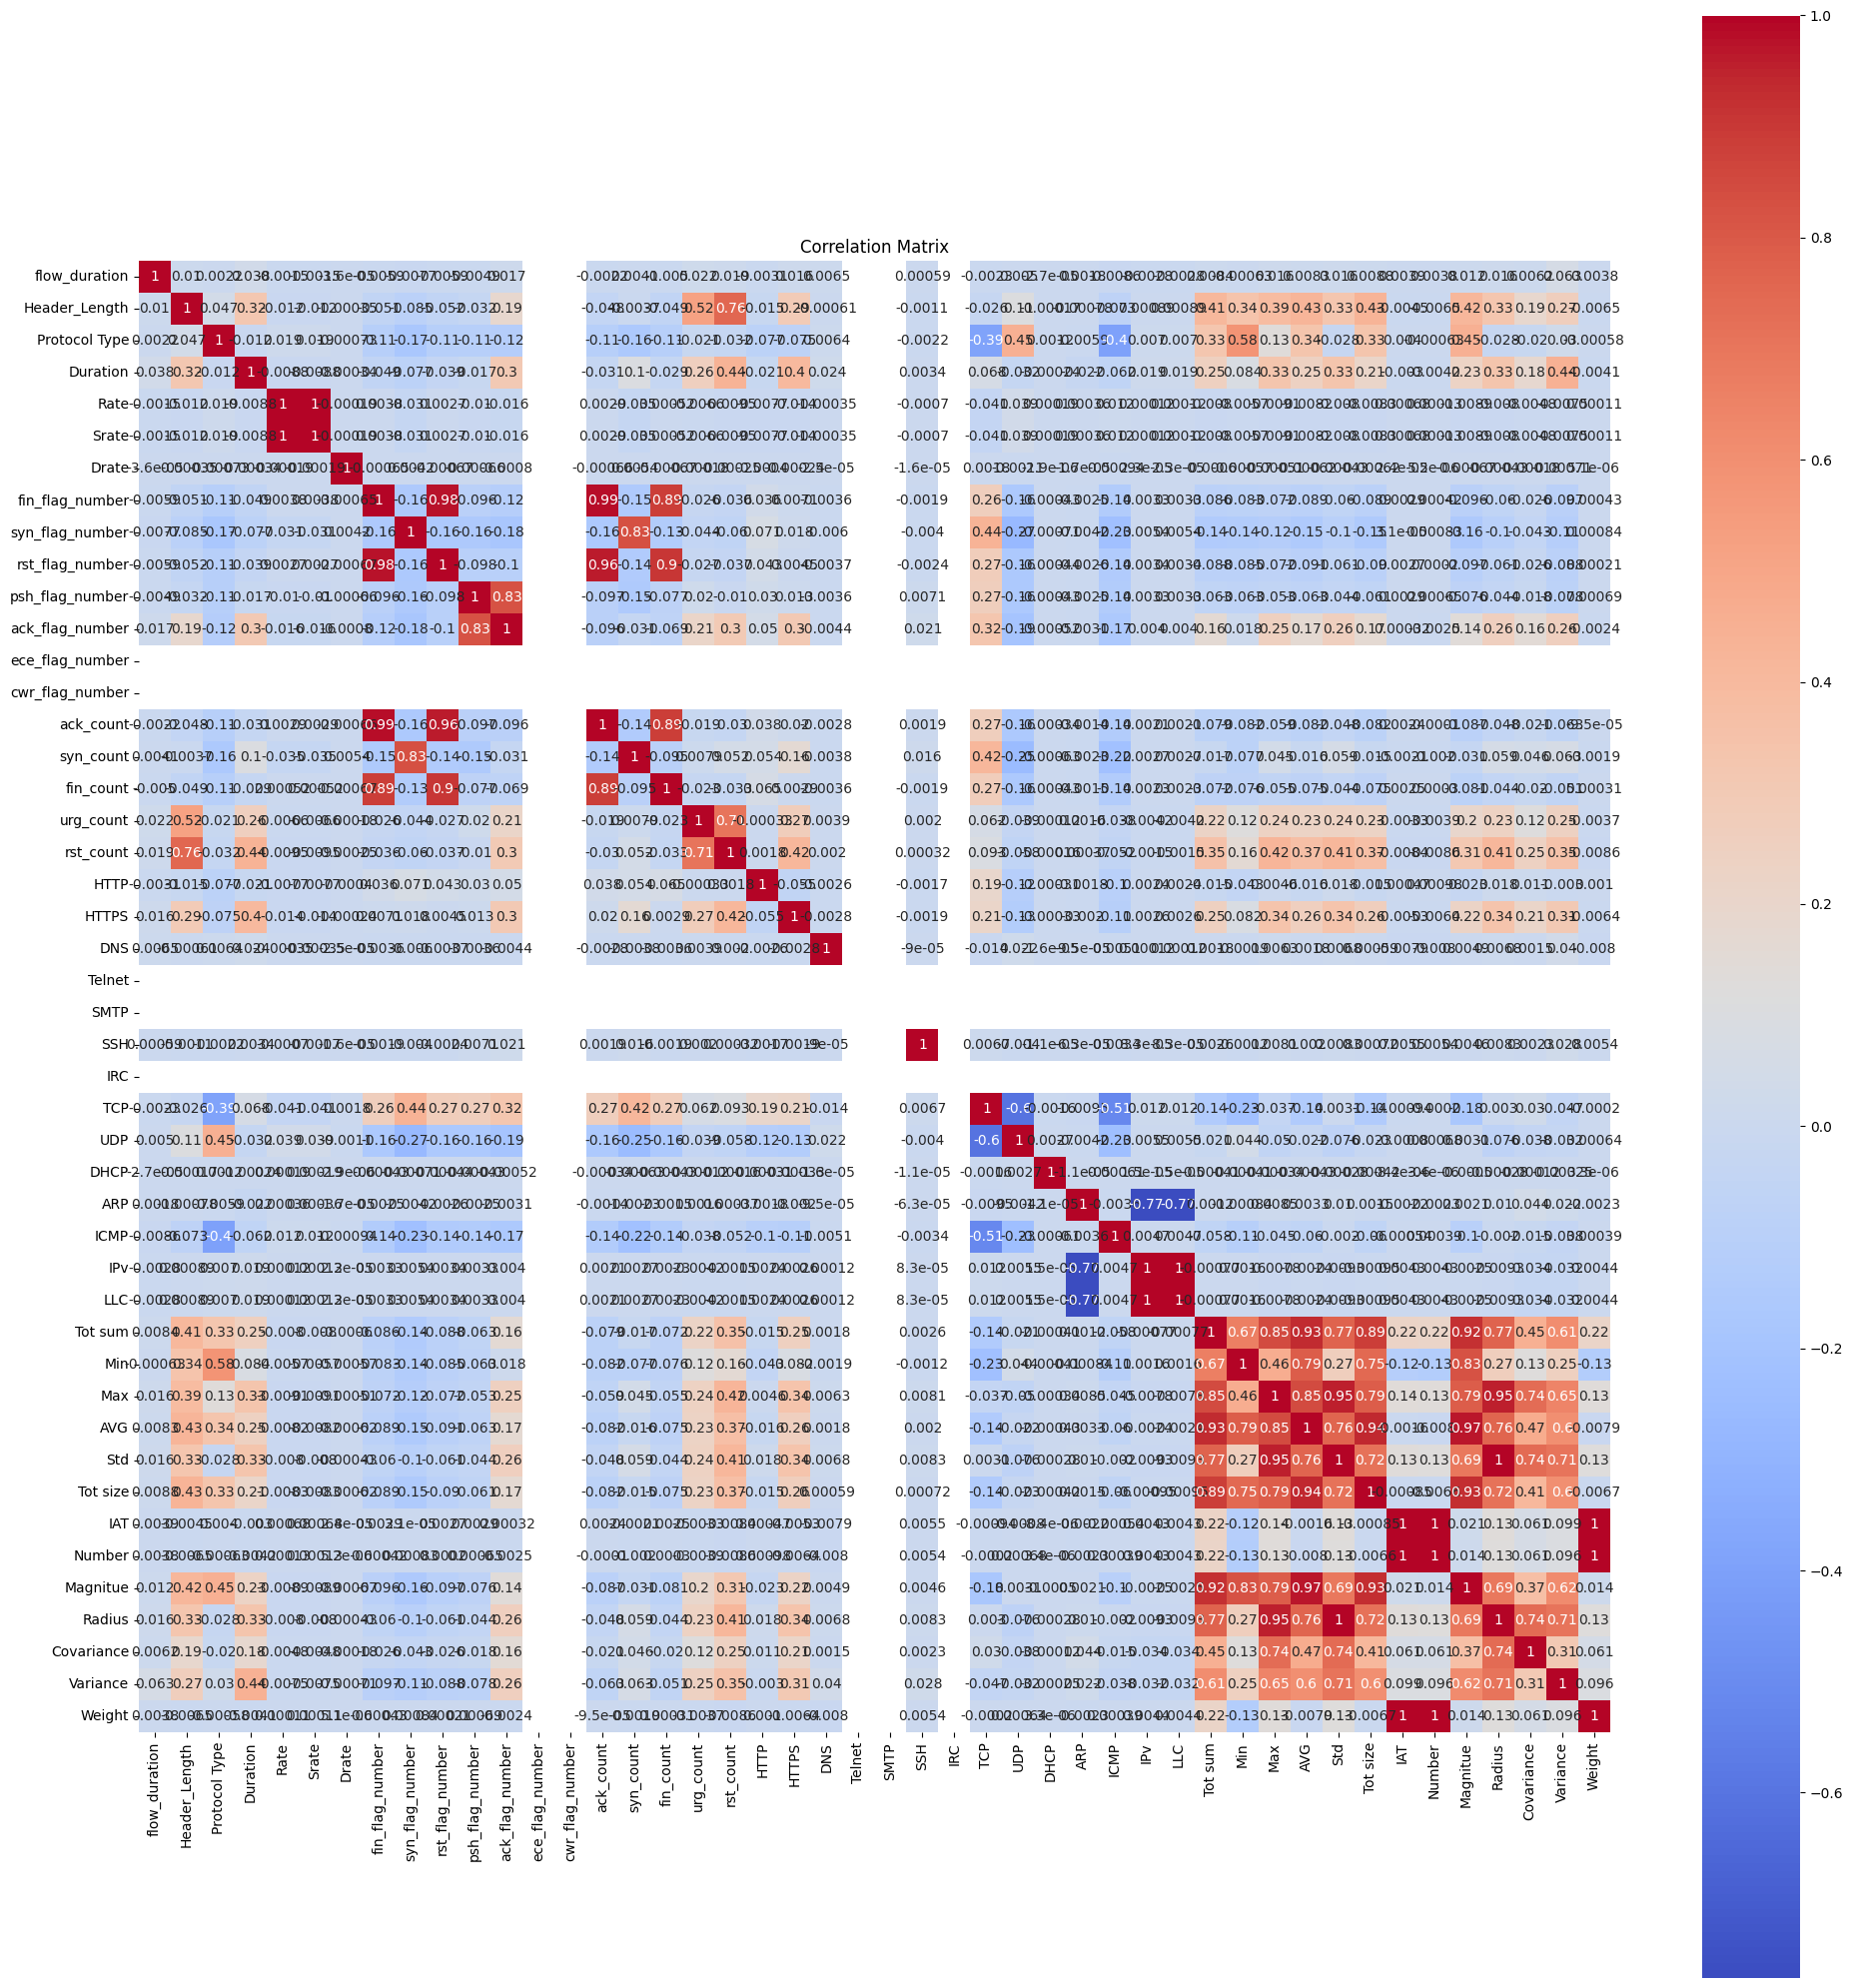

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation matrix (excluding the 'label' column)
corr_matrix = scaled_df.drop('label', axis=1).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [6]:
import numpy as np

# Calculate the absolute correlation matrix
abs_corr_matrix = np.abs(corr_matrix)

# Create a mask to ignore self-correlations (diagonal elements)
mask = np.triu(np.ones_like(abs_corr_matrix, dtype=bool), k=1)

# Find highly correlated features
highly_correlated = np.where(abs_corr_matrix > 0.8)
highly_correlated_pairs = [(abs_corr_matrix.columns[x], abs_corr_matrix.columns[y]) for x, y in zip(*highly_correlated) if x != y and x < y]

# Print the highly correlated features
print("Highly Correlated Features (Correlation > 0.8):")
for pair in highly_correlated_pairs:
    corr = corr_matrix.loc[pair[0], pair[1]]
    print(f"{pair[0]} and {pair[1]}: Correlation = {corr:.2f}")

# Calculate feature correlations with the target variable (if available)
if 'label' in scaled_df.columns:
    target_corr = abs_corr_matrix['label'].drop('label')
    print("\nFeature Correlations with the Target Variable:")
    for feature, corr in target_corr.items():
        print(f"{feature}: Correlation = {corr:.2f}")
else:
    print("\nTarget variable 'label' not found in the dataset.")

# Print the number of features
print(f"\nTotal number of features: {len(scaled_df.columns)}")

Highly Correlated Features (Correlation > 0.8):
Rate and Srate: Correlation = 1.00
fin_flag_number and rst_flag_number: Correlation = 0.98
fin_flag_number and ack_count: Correlation = 0.99
fin_flag_number and fin_count: Correlation = 0.89
syn_flag_number and syn_count: Correlation = 0.83
rst_flag_number and ack_count: Correlation = 0.96
rst_flag_number and fin_count: Correlation = 0.90
psh_flag_number and ack_flag_number: Correlation = 0.83
ack_count and fin_count: Correlation = 0.89
IPv and LLC: Correlation = 1.00
Tot sum and Max: Correlation = 0.85
Tot sum and AVG: Correlation = 0.93
Tot sum and Tot size: Correlation = 0.89
Tot sum and Magnitue: Correlation = 0.92
Min and Magnitue: Correlation = 0.83
Max and AVG: Correlation = 0.85
Max and Std: Correlation = 0.95
Max and Radius: Correlation = 0.95
AVG and Tot size: Correlation = 0.94
AVG and Magnitue: Correlation = 0.97
Std and Radius: Correlation = 1.00
Tot size and Magnitue: Correlation = 0.93
IAT and Number: Correlation = 1.00
IAT

KeyError: 'label'

Based on the correlation analysis, here are my recommendations for feature selection:

* Rate and Srate: Keep one of them, as they have a perfect correlation (1.00).
* fin_flag_number, rst_flag_number, ack_count, and fin_count: Keep one of them, as they have high correlations with each other (>0.89).
* syn_flag_number and syn_count: Keep one of them, as they have a high correlation (0.83).
* psh_flag_number and ack_flag_number: Keep one of them, as they have a high correlation (0.83).
* IPv and LLC: Keep one of them, as they have a perfect correlation (1.00).
* Tot sum, Max, AVG, Tot size, and Magnitue: Keep one or two of them, as they have high correlations with each other (>0.85).
* Min and Magnitue: Keep one of them, as they have a high correlation (0.83).
* Std and Radius: Keep one of them, as they have a perfect correlation (1.00).
* IAT, Number, and Weight: Keep one of them, as they have perfect correlations (1.00).

For the remaining features that do not have high correlations with others, you can consider keeping them if they are relevant to the anomaly detection task based on domain knowledge.

In [ ]:
selected_features = [
    'flow_duration',
    'Header_Length',
    'Protocol Type',
    'Duration',
    'Rate',  # Keep Rate or Srate
    'fin_flag_number',  # Keep one of fin_flag_number, rst_flag_number, ack_count, or fin_count
    'syn_flag_number',  # Keep syn_flag_number or syn_count
    'psh_flag_number',  # Keep psh_flag_number or ack_flag_number
    'HTTP',
    'HTTPS',
    'DNS',
    # Add other relevant features that do not have high correlations
]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# Split the data into training and testing sets
X = scaled_df[selected_features]
y = scaled_df['label'] if 'label' in scaled_df.columns else None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Isolation Forest algorithm
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the algorithm to the training data
iso_forest.fit(X_train)

# Predict anomalies on the testing data
anomalies = iso_forest.predict(X_test)

# Print the number of anomalies detected
num_anomalies = len(anomalies[anomalies == -1])
print(f"Number of anomalies detected: {num_anomalies}")

# Evaluate the performance (if true labels are available)
if y_test is not None:
    from sklearn.metrics import precision_score, recall_score, f1_score

    y_test_anomalies = (y_test != 'BenignTraffic').astype(int)
    precision = precision_score(y_test_anomalies, anomalies == -1)
    recall = recall_score(y_test_anomalies, anomalies == -1)
    f1 = f1_score(y_test_anomalies, anomalies == -1)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

* Number of anomalies detected: The algorithm detected 20,820 anomalies in the testing data.
* Precision: The precision score of 0.81 indicates that 81% of the data points classified as anomalies by the algorithm are actually anomalies according to the true labels. This suggests that the algorithm has a relatively high precision and is able to correctly identify a significant proportion of true anomalies.
* Recall: The recall score of 0.08 indicates that the algorithm is able to identify only 8% of the total anomalies present in the testing data. This suggests that the algorithm is missing a considerable number of true anomalies and has a high false negative rate.
* F1-score: The F1-score of 0.15 is the harmonic mean of precision and recall. It provides an overall measure of the algorithm's performance, considering both precision and recall. The low F1-score suggests that there is room for improvement in the anomaly detection algorithm.

**Adjust the contamination rate**

In [ ]:
# Initialize the Isolation Forest algorithm with different contamination rates
contamination_rates = [0.05, 0.1, 0.15, 0.2]

for contamination in contamination_rates:
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(X_train)
    anomalies = iso_forest.predict(X_test)
    
    num_anomalies = len(anomalies[anomalies == -1])
    print(f"Contamination rate: {contamination}")
    print(f"Number of anomalies detected: {num_anomalies}")
    
    if y_test is not None:
        y_test_anomalies = (y_test != 'BenignTraffic').astype(int)
        precision = precision_score(y_test_anomalies, anomalies == -1)
        recall = recall_score(y_test_anomalies, anomalies == -1)
        f1 = f1_score(y_test_anomalies, anomalies == -1)
        
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
    
    print()

* As the contamination rate increases, the number of anomalies detected by the Isolation Forest algorithm also increases. This is expected, as a higher contamination rate allows the algorithm to identify more data points as anomalies.
* The precision score improves as the contamination rate increases. With a contamination rate of 0.2, the precision reaches 0.89, indicating that 89% of the detected anomalies are true anomalies. This suggests that the algorithm becomes more precise in identifying anomalies as the contamination rate increases.
* The recall score also improves with higher contamination rates. However, even with a contamination rate of 0.2, the recall is still relatively low at 0.18. This means that the algorithm is able to identify only 18% of the total anomalies in the dataset.
* The F1-score, which is the harmonic mean of precision and recall, increases with higher contamination rates. The highest F1-score of 0.30 is achieved with a contamination rate of 0.2.

**Experiment with different algorithms (LOF, One-Class SVM)**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(contamination=0.1)
lof.fit(X_train)
anomalies_lof = lof.predict(X_test)

# One-Class SVM
ocsvm = OneClassSVM(nu=0.1)
ocsvm.fit(X_train)
anomalies_ocsvm = ocsvm.predict(X_test)

# Evaluate LOF
num_anomalies_lof = len(anomalies_lof[anomalies_lof == -1])
print("Local Outlier Factor (LOF):")
print(f"Number of anomalies detected: {num_anomalies_lof}")

if y_test is not None:
    y_test_anomalies = (y_test != 'BenignTraffic').astype(int)
    precision_lof = precision_score(y_test_anomalies, anomalies_lof == -1)
    recall_lof = recall_score(y_test_anomalies, anomalies_lof == -1)
    f1_lof = f1_score(y_test_anomalies, anomalies_lof == -1)
    
    print(f"Precision: {precision_lof:.2f}")
    print(f"Recall: {recall_lof:.2f}")
    print(f"F1-score: {f1_lof:.2f}")

print()

# Evaluate One-Class SVM
num_anomalies_ocsvm = len(anomalies_ocsvm[anomalies_ocsvm == -1])
print("One-Class SVM:")
print(f"Number of anomalies detected: {num_anomalies_ocsvm}")

if y_test is not None:
    y_test_anomalies = (y_test != 'BenignTraffic').astype(int)
    precision_ocsvm = precision_score(y_test_anomalies, anomalies_ocsvm == -1)
    recall_ocsvm = recall_score(y_test_anomalies, anomalies_ocsvm == -1)
    f1_ocsvm = f1_score(y_test_anomalies, anomalies_ocsvm == -1)
    
    print(f"Precision: {precision_ocsvm:.2f}")
    print(f"Recall: {recall_ocsvm:.2f}")
    print(f"F1-score: {f1_ocsvm:.2f}")